<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [57]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [58]:
# load the csv file
df= pd.read_csv('Life_Expectancy.csv')
df.head()
# type your code here

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

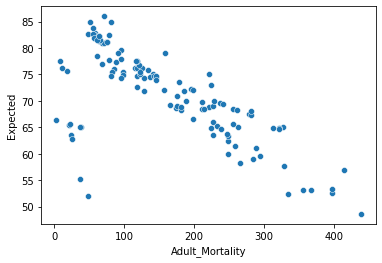

-0.7108678534954708

In [60]:
sns.scatterplot(df['Adult_Mortality'],df['Expected'])
plt.show()
df['Adult_Mortality'].corr(df['Expected'])
# Negative correlation between x and y 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [61]:
# type your code here
x=df['Income_Index']
y=df['Expected']
import statsmodels.api as sm
xc= sm.add_constant(x)

ols_model = sm.OLS(y,xc)
linear_model=ols_model.fit()
np.sum(linear_model.resid**2)

2549.584803454098

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [62]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [63]:
x=df[['Hepatitis ','Measles ','Polio','Diphtheria ',' HIV']]
y=df['Expected']
xc= sm.add_constant(x)
import statsmodels.api as sm
ols_model = sm.OLS(y,xc)
linear_model=ols_model.fit()
linear_model.summary(yname=None, xname=None, title='immunization vs expectancy', alpha=0.05)
# There is an impact on expectancy while considering  hiv and polio

<class 'statsmodels.iolib.summary.Summary'>
"""
                          immunization vs expectancy                          
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     29.24
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           3.29e-19
Time:                        20:32:04   Log-Likelihood:                -390.37
No. Observations:                 124   AIC:                             792.7
Df Residuals:                     118   BIC:                             809.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          63.2112      2.633     24.005      0.000      57.997      68.426
Hepatitis      -0.0403      0.050     -0.812      0.419      -0.139       0.058
Measles     -6.194e-05   4.56e-05     -1.358      0.177      -0.000    2.84e-05
Polio           0.0776      0.032      2.462      0.015       0.015       0.140
Diphtheria      0.0846      0.060      1.411      0.161      -0.034       0.203
 HIV           -3.1051      0.299    -10.398      0.000      -3.696      -2.514
==============================================================================
Omnibus:                        9.186   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.661
Skew:                          -0.034   Prob(JB):                        0.160
Kurtosis:                       2.161   Cond. No.                     6.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
df['Status'].unique()
df['Status'] =df['Status'].replace({'Developing':0,'Developed':1})

In [65]:
x=df[['Hepatitis ','Measles ','Polio','Diphtheria ',' HIV','Status']]
y=df['Expected']
xc= sm.add_constant(x)
import statsmodels.api as sm
ols_model = sm.OLS(y,xc)
linear_model=ols_model.fit()
linear_model.summary(yname=None, xname=None, title='immunization & status vs expectancy', alpha=0.05)
# Based on R squared value it tells it impacts the impact of immunzation on life expectancy 

<class 'statsmodels.iolib.summary.Summary'>
"""
                     immunization & status vs expectancy                      
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     39.37
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           6.90e-26
Time:                        20:32:04   Log-Likelihood:                -371.84
No. Observations:                 124   AIC:                             757.7
Df Residuals:                     117   BIC:                             777.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          63.6740      2.278     27.946      0.000      59.162      68.186
Hepatitis       0.0351      0.045      0.788      0.432      -0.053       0.123
Measles     -4.316e-05   3.96e-05     -1.091      0.277      -0.000    3.52e-05
Polio           0.0679      0.027      2.487      0.014       0.014       0.122
Diphtheria     -0.0016      0.054     -0.030      0.976      -0.108       0.104
 HIV           -2.8797      0.261    -11.048      0.000      -3.396      -2.363
Status          8.5199      1.334      6.385      0.000       5.877      11.162
==============================================================================
Omnibus:                        1.671   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.434   Jarque-Bera (JB):                1.679
Skew:                           0.214   Prob(JB):                        0.432
Kurtosis:                       2.623   Cond. No.                     6.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Country"]= le.fit_transform(df.Country)
df.head()
x=df[['Country','Status','Adult_Mortality','Infant_Deaths','Hepatitis ','Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index',]]
y = df["Expected"]
import statsmodels.api as sm
xc = sm.add_constant(x)
ols_model =  sm.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
# y_pred
linear_model.summary()
# df.info()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     37.82
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.23e-36
Time:                        20:32:04   Log-Likelihood:                -322.83
No. Observations:                 124   AIC:                             679.7
Df Residuals:                     107   BIC:                             727.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 59.7644      3.204     18.652      0.000      53.412      66.116
Country               -0.0155      0.011     -1.428      0.156      -0.037       0.006
Status                 2.3993      1.110      2.161      0.033       0.198       4.600
Adult_Mortality       -0.0224      0.004     -5.522      0.000      -0.030      -0.014
Infant_Deaths          0.0597      0.037      1.626      0.107      -0.013       0.133
Hepatitis              0.0636      0.032      2.001      0.048       0.001       0.127
Measles            -5.513e-05   6.06e-05     -0.910      0.365      -0.000     6.5e-05
 BMI                  -0.0277      0.022     -1.235      0.220      -0.072       0.017
Underfive_Deaths      -0.0425      0.027     -1.577      0.118      -0.096       0.011
Polio                 -0.0020      0.023     -0.087      0.931      -0.047       0.043
Diphtheria            -0.0287      0.040     -0.724      0.471      -0.107       0.050
 HIV                  -0.9616      0.273     -3.521      0.001      -1.503      -0.420
GDP                 5.019e-05   3.46e-05      1.452      0.149   -1.83e-05       0.000
Population         -1.609e-08   8.81e-09     -1.826      0.071   -3.36e-08    1.37e-09
Malnourished10_19     -0.4995      0.299     -1.673      0.097      -1.091       0.092
Malnourished5_9        0.2830      0.278      1.016      0.312      -0.269       0.835
Income_Index          22.8141      4.279      5.332      0.000      14.332      31.296
==============================================================================
Omnibus:                        9.012   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               15.030
Skew:                           0.284   Prob(JB):                     0.000545
Kurtosis:                       4.609   Cond. No.                     7.19e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
x = df[["Income_Index","GDP"]]
y = df["Expected"]
import statsmodels.api as api
xc = api.add_constant(x)
ols_model =  api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred 

ssr = np.sum((y_pred - np.mean(df["Expected"]))**2)
sse = np.sum((y_pred - y)**2)
print(sse + ssr)
print(ssr)

8819.805483857925
6292.571603986788


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
x=df['Income_Index']
y = df["Expected"]
import statsmodels.api as sm
xc = sm.add_constant(x)
ols_model =  sm.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.13e-34
Time:                        20:32:04   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

In [70]:
x=df['Adult_Mortality']
y = df["Expected"]
import statsmodels.api as sm
xc = sm.add_constant(x)
ols_model =  sm.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     124.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.27e-20
Time:                        20:32:05   Log-Likelihood:                -396.71
No. Observations:                 124   AIC:                             797.4
Df Residuals:                     122   BIC:                             803.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.7106      1.005     80.272      0.000      78.720      82.701
Adult_Mortality    -0.0591      0.005    -11.164      0.000      -0.070      -0.049
==============================================================================
Omnibus:                       57.611   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.621
Skew:                          -1.821   Prob(JB):                     1.32e-35
Kurtosis:                       7.222   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
x=df[['Adult_Mortality','Population']]
y = df["Expected"]
import statsmodels.api as sm
xc = sm.add_constant(x)
ols_model =  sm.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred
linear_model.summary()
#addition of  population of the country does not  lead to a better prediction 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     62.12
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.74e-19
Time:                        20:32:05   Log-Likelihood:                -396.54
No. Observations:                 124   AIC:                             799.1
Df Residuals:                     121   BIC:                             807.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              80.6129      1.023     78.783      0.000      78.587      82.639
Adult_Mortality    -0.0594      0.005    -11.133      0.000      -0.070      -0.049
Population       7.436e-09   1.33e-08      0.561      0.576   -1.88e-08    3.37e-08
==============================================================================
Omnibus:                       57.763   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.344
Skew:                          -1.826   Prob(JB):                     9.22e-36
Kurtosis:                       7.231   Cond. No.                     8.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Country"]= le.fit_transform(df.Country)
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,0,0,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,1,0,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,2,0,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,3,0,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,4,0,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


In [73]:
x=df.drop(columns='Expected')
y = df["Expected"]
import statsmodels.api as sm
xc = sm.add_constant(x)
ols_model =  sm.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     35.64
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           4.83e-36
Time:                        20:32:05   Log-Likelihood:                -322.27
No. Observations:                 124   AIC:                             680.5
Df Residuals:                     106   BIC:                             731.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 58.8873      3.328     17.693      0.000      52.289      65.486
Country               -0.0150      0.011     -1.379      0.171      -0.036       0.007
Status                 2.0604      1.163      1.771      0.079      -0.246       4.367
Adult_Mortality       -0.0225      0.004     -5.537      0.000      -0.031      -0.014
Infant_Deaths          0.0582      0.037      1.582      0.117      -0.015       0.131
Hepatitis              0.0605      0.032      1.893      0.061      -0.003       0.124
Measles            -5.794e-05   6.07e-05     -0.955      0.342      -0.000    6.23e-05
 BMI                  -0.0300      0.023     -1.327      0.187      -0.075       0.015
Underfive_Deaths      -0.0411      0.027     -1.521      0.131      -0.095       0.012
Polio                 -0.0014      0.023     -0.061      0.951      -0.046       0.043
Diphtheria            -0.0302      0.040     -0.760      0.449      -0.109       0.049
 HIV                  -0.9555      0.273     -3.497      0.001      -1.497      -0.414
GDP                  4.81e-05   3.46e-05      1.388      0.168   -2.06e-05       0.000
Population          -1.54e-08   8.84e-09     -1.741      0.085   -3.29e-08    2.13e-09
Malnourished10_19     -0.5414      0.302     -1.794      0.076      -1.140       0.057
Malnourished5_9        0.3322      0.283      1.174      0.243      -0.229       0.893
Income_Index          18.3095      6.291      2.910      0.004       5.837      30.782
Schooling              0.3370      0.345      0.977      0.331      -0.347       1.021
==============================================================================
Omnibus:                        7.484   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               12.040
Skew:                           0.208   Prob(JB):                      0.00243
Kurtosis:                       4.469   Cond. No.                     9.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<a id="assum"> </a>
## 5. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

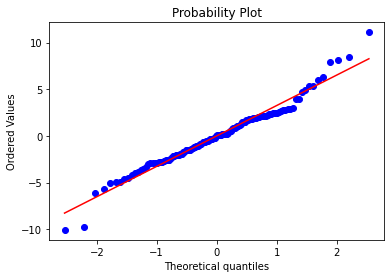

In [74]:
from scipy import stats
stats.probplot(linear_model.resid,plot=plt)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
x=df[['Status','GDP']]
y = df["Expected"]
import statsmodels.api as sm
xc = sm.add_constant(x)
ols_model =  sm.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     32.20
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           6.13e-12
Time:                        20:32:05   Log-Likelihood:                -413.89
No. Observations:                 124   AIC:                             833.8
Df Residuals:                     121   BIC:                             842.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.0644      0.746     91.247      0.000      66.588      69.541
Status         9.0771      1.830      4.959      0.000       5.453      12.701
GDP            0.0003   6.08e-05      4.228      0.000       0.000       0.000
==============================================================================
Omnibus:                        6.257   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.164
Skew:                          -0.546   Prob(JB):                       0.0459
Kurtosis:                       3.036   Cond. No.                     3.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
df.columns

Index(['Country', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Underfive_Deaths ', 'Polio', 'Diphtheria ',
       ' HIV', 'GDP', 'Population', 'Malnourished10_19 ', 'Malnourished5_9',
       'Income_Index', 'Schooling', 'Expected'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [77]:
x=df.drop(columns='Expected')
y = df["Expected"]
import statsmodels.api as sm
ols_model =  sm.OLS(y,x)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Expected   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              766.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                   1.80e-103
Time:                        20:32:06   Log-Likelihood:                         -407.49
No. Observations:                 124   AIC:                                      849.0
Df Residuals:                     107   BIC:                                      896.9
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Country                0.0208      0.021      0.987      0.326      -0.021       0.063
Status                -2.9914      2.232     -1.340      0.183      -7.416       1.433
Adult_Mortality       -0.0009      0.008     -0.120      0.905      -0.016       0.014
Infant_Deaths         -0.1159      0.070     -1.653      0.101      -0.255       0.023
Hepatitis              0.0677      0.063      1.071      0.287      -0.058       0.193
Measles               -0.0002      0.000     -1.297      0.197      -0.000    8.19e-05
 BMI                  -0.0545      0.045     -1.222      0.225      -0.143       0.034
Underfive_Deaths       0.0959      0.051      1.874      0.064      -0.006       0.197
Polio                  0.0264      0.044      0.594      0.554      -0.062       0.115
Diphtheria             0.0127      0.078      0.162      0.872      -0.143       0.168
 HIV                   0.4719      0.517      0.914      0.363      -0.552       1.496
GDP                 -6.71e-05   6.73e-05     -0.996      0.321      -0.000    6.64e-05
Population         -1.578e-08   1.75e-08     -0.902      0.369   -5.05e-08    1.89e-08
Malnourished10_19     -0.9532      0.595     -1.601      0.112      -2.133       0.227
Malnourished5_9        1.7566      0.537      3.271      0.001       0.692       2.821
Income_Index          49.1750     11.962      4.111      0.000      25.462      72.887
Schooling              1.9836      0.657      3.017      0.003       0.680       3.287
==============================================================================
Omnibus:                       15.177   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.854
Skew:                           0.807   Prob(JB):                     0.000219
Kurtosis:                       3.810   Cond. No.                     8.67e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Now we shall consider the FEV dataset.

### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in youths and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height (cm):** Height (cm) in cm 

**Sex:** Gender of a person

**Smoke_habits** Whether the person is a smoker or non- smoker

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [78]:
df= pd.read_csv('FEV_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          654 non-null    int64  
 1   Height (cm)  654 non-null    float64
 2   Sex          654 non-null    object 
 3   Smoke_habit  654 non-null    object 
 4   FEV          654 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 25.7+ KB


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Identify the numeric variable(s) that have highest impact on the FEV of a person</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
df['Sex']=df['Sex'].replace({'F':0,'M':1})
df['Smoke_habit']= df['Smoke_habit'].replace({'smoker':0,'non-smoker':1})

In [80]:
x= df.drop(columns=['Sex','Smoke_habit'])
y=df['FEV']
import statsmodels.api as sm
xc = sm.add_constant(x)
ols_model =  sm.OLS(y,xc)
linear_model = ols_model.fit()
lr=linear_model.resid
y_pred = linear_model.predict()
y_pred
linear_model.summary()
# all numerical varfiables have significant impact 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.590e+30
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:32:06   Log-Likelihood:                 20147.
No. Observations:                 654   AIC:                        -4.029e+04
Df Residuals:                     650   BIC:                        -4.027e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.125e-14   1.82e-14     -1.717      0.086    -6.7e-14    4.49e-15
Age          2.255e-16   1.46e-16      1.547      0.122   -6.08e-17    5.12e-16
Height (cm)  2.629e-16   1.24e-16      2.122      0.034    1.97e-17    5.06e-16
FEV             1.0000   8.17e-16   1.22e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      114.308   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.544
Skew:                          -0.800   Prob(JB):                     9.49e-86
Kurtosis:                       6.437   Cond. No.                     7.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. What is the impact of smoking habit of a person on FEV?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [81]:
x= df['Smoke_habit']
y=df['FEV']
import statsmodels.api as sm
xc = sm.add_constant(x)
ols_model =  sm.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
y_pred
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    FEV   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     70.92
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.36e-16
Time:                        20:32:06   Log-Likelihood:                -800.43
No. Observations:                 654   AIC:                             1605.
Df Residuals:                     652   BIC:                             1614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.5428      0.034     74.570      0.000       2.476       2.610
Smoke_habit     0.8778      0.104      8.422      0.000       0.673       1.082
==============================================================================
Omnibus:                       37.782   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.957
Skew:                           0.622   Prob(JB):                     4.70e-10
Kurtosis:                       3.167   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether there is multicollinearity present or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

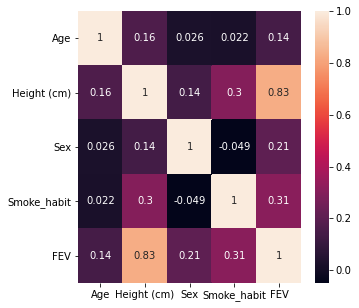

In [82]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [83]:
x= df.drop(columns=['Sex','Smoke_habit'])
y=df['FEV']
import statsmodels.api as sm
xc = sm.add_constant(x)
# ols_model =  sm.OLS(y,xc)
# linear_model = ols_model.fit()
# y_pred = linear_model.predict()
# y_pred
linear_model.summary()
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[ vif(xc.values,i) for i in range(xc.shape[1]) ]
pd.DataFrame(vf,index=xc.columns,columns=['vif'])
# all are moderate correlation

,vif
const,2105.084374
Age,1.027941
Height (cm),3.203638
FEV,3.181292


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
# H0: The error terms are not autocorrelated 
# H1: The error terms are autocorrelated
from statsmodels.stats.stattools import durbin_watson
durbin_watson(lr)
# since p value is less than 0.05 we can reject null hypothesis and say The error terms are autocorrelated

0.02011902500534767

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [89]:
# HO : the errors are Homoscedastic
# HA : the errors are Hetroscedastic
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(lr,xc)
# pval < 0.05 hence ho is rejected hence the errors are Hetroscedastic

(2.0041768178271546, 3.1759084515309446e-10, 'increasing')

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Build a full model on 70% of the given data. Calculate the mean square error and the root mean square error on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [90]:
x=df.drop(columns='FEV')
y=df['FEV']

In [91]:
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=100)
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
ytest[0:3]
mse= mean_squared_error(ytest,y_pred)
rmse= np.sqrt(mse)
print('RMSE',rmse)
r2= r2_score(ytest,y_pred)
print('R-Squared',r2)

RMSE 0.4996615719348831
R-Squared 0.654114840062644


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error for the test set using the model in Q18. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [92]:
mae= mean_absolute_error(ytest,y_pred)
print('MAE',mae)
mape= mean_absolute_percentage_error(ytest,y_pred)
print('MAPE',mape)

MAE 0.33952873575687875
MAPE 0.14001347545417497


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build the full model on 80% of the given data and check if the model is overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.2,random_state=100)
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
ytest[0:3]
mse= mean_squared_error(ytest,y_pred)
rmse= np.sqrt(mse)
print('RMSE',rmse)
r2= r2_score(ytest,y_pred)
print('R-Squared',r2)
# since RMSE value is less the model is not overfitted

RMSE 0.49306126602233513
R-Squared 0.5579941207233851
